<a href="https://colab.research.google.com/github/Borja-rg/idal_ia3/blob/main/Copia_de_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

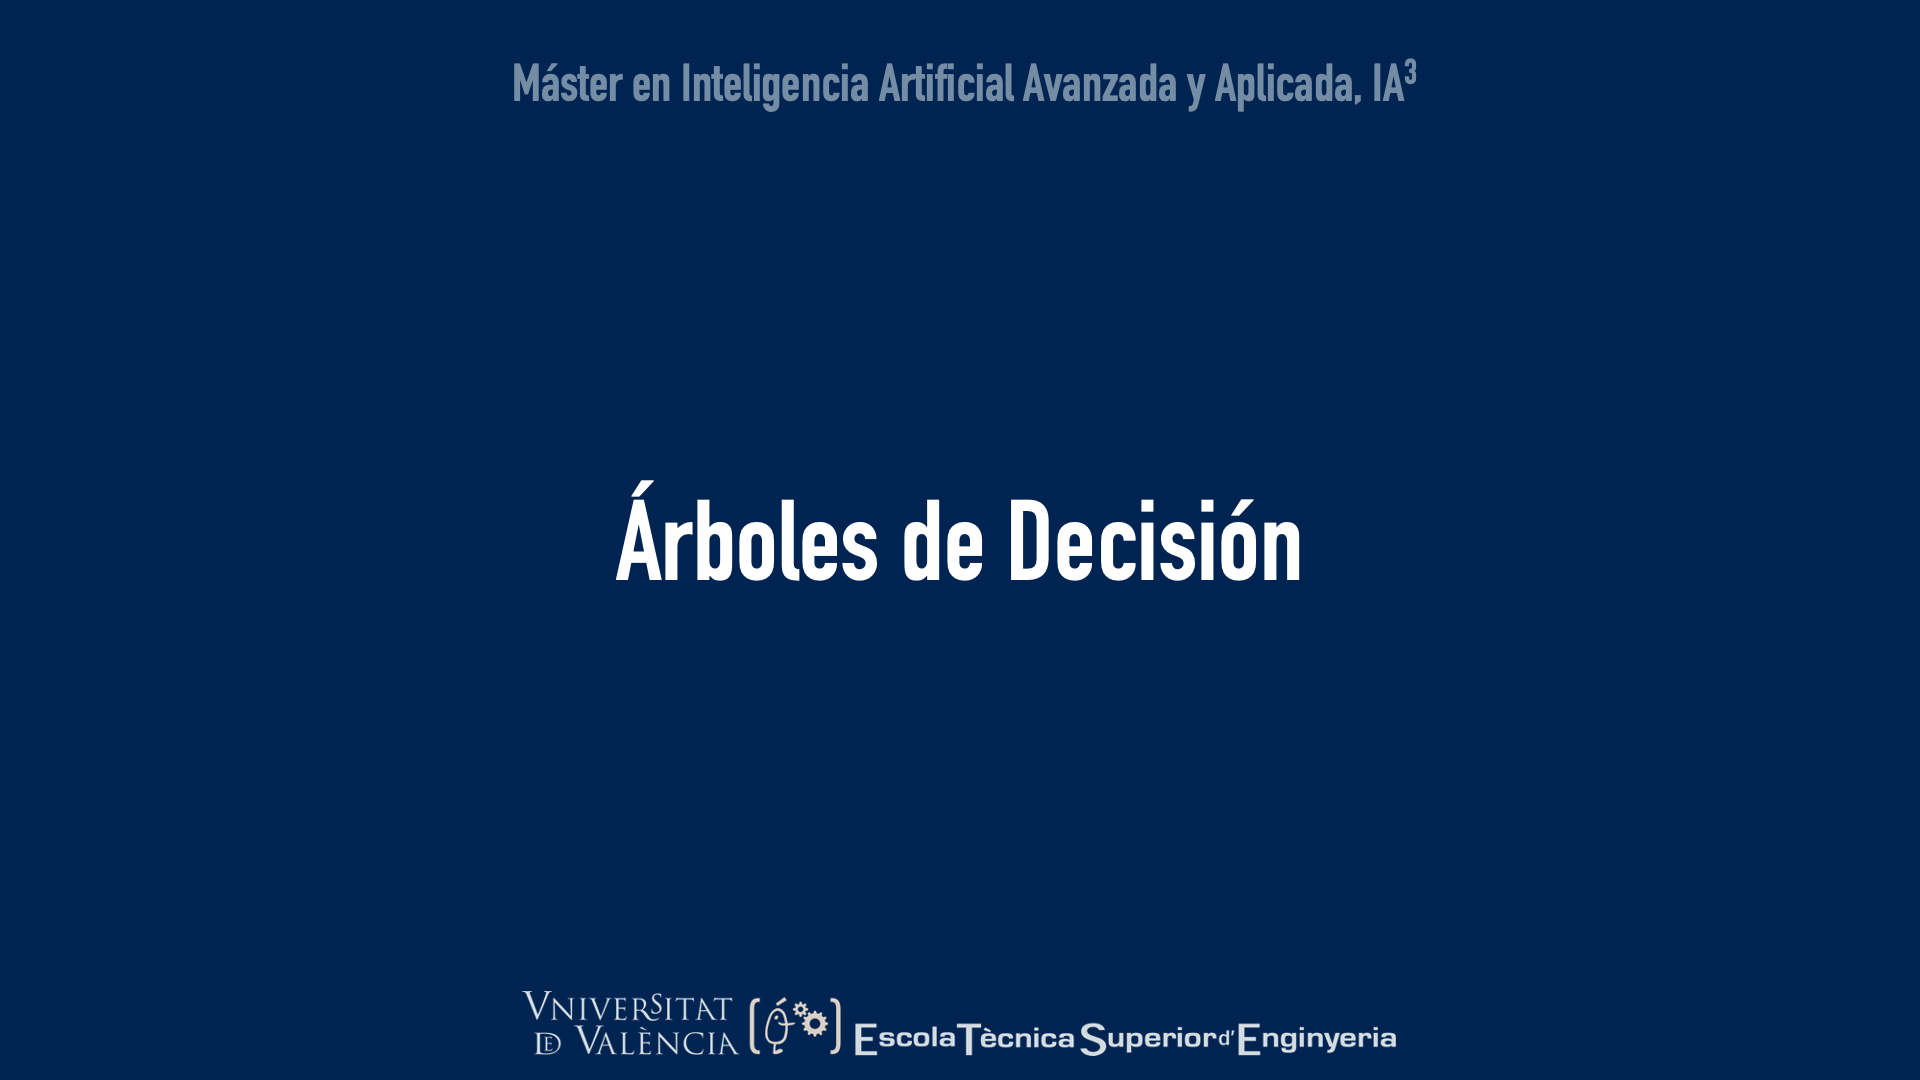

Los árboles de decisión son uno de los algoritmos más conocidos entre los clásicos. Se han aplicado para resolver problemas analíticos en multitud de ámbitos. Por dar un ejemplo de su versatilidad la inteligencia artificial del videojuego Black and White está desarrollada utilizando este flexible algoritmo.

https://en.wikipedia.org/wiki/Black_%26_White_(video_game)

Este tipo de algoritmo intenta dividir el dataset utilizando distintas variables hasta alcanzar la mejor división posible.

Para aprender a manejar este algoritmo, vamos a preparar un proyecto desde 0 basado en árboles de decisión.

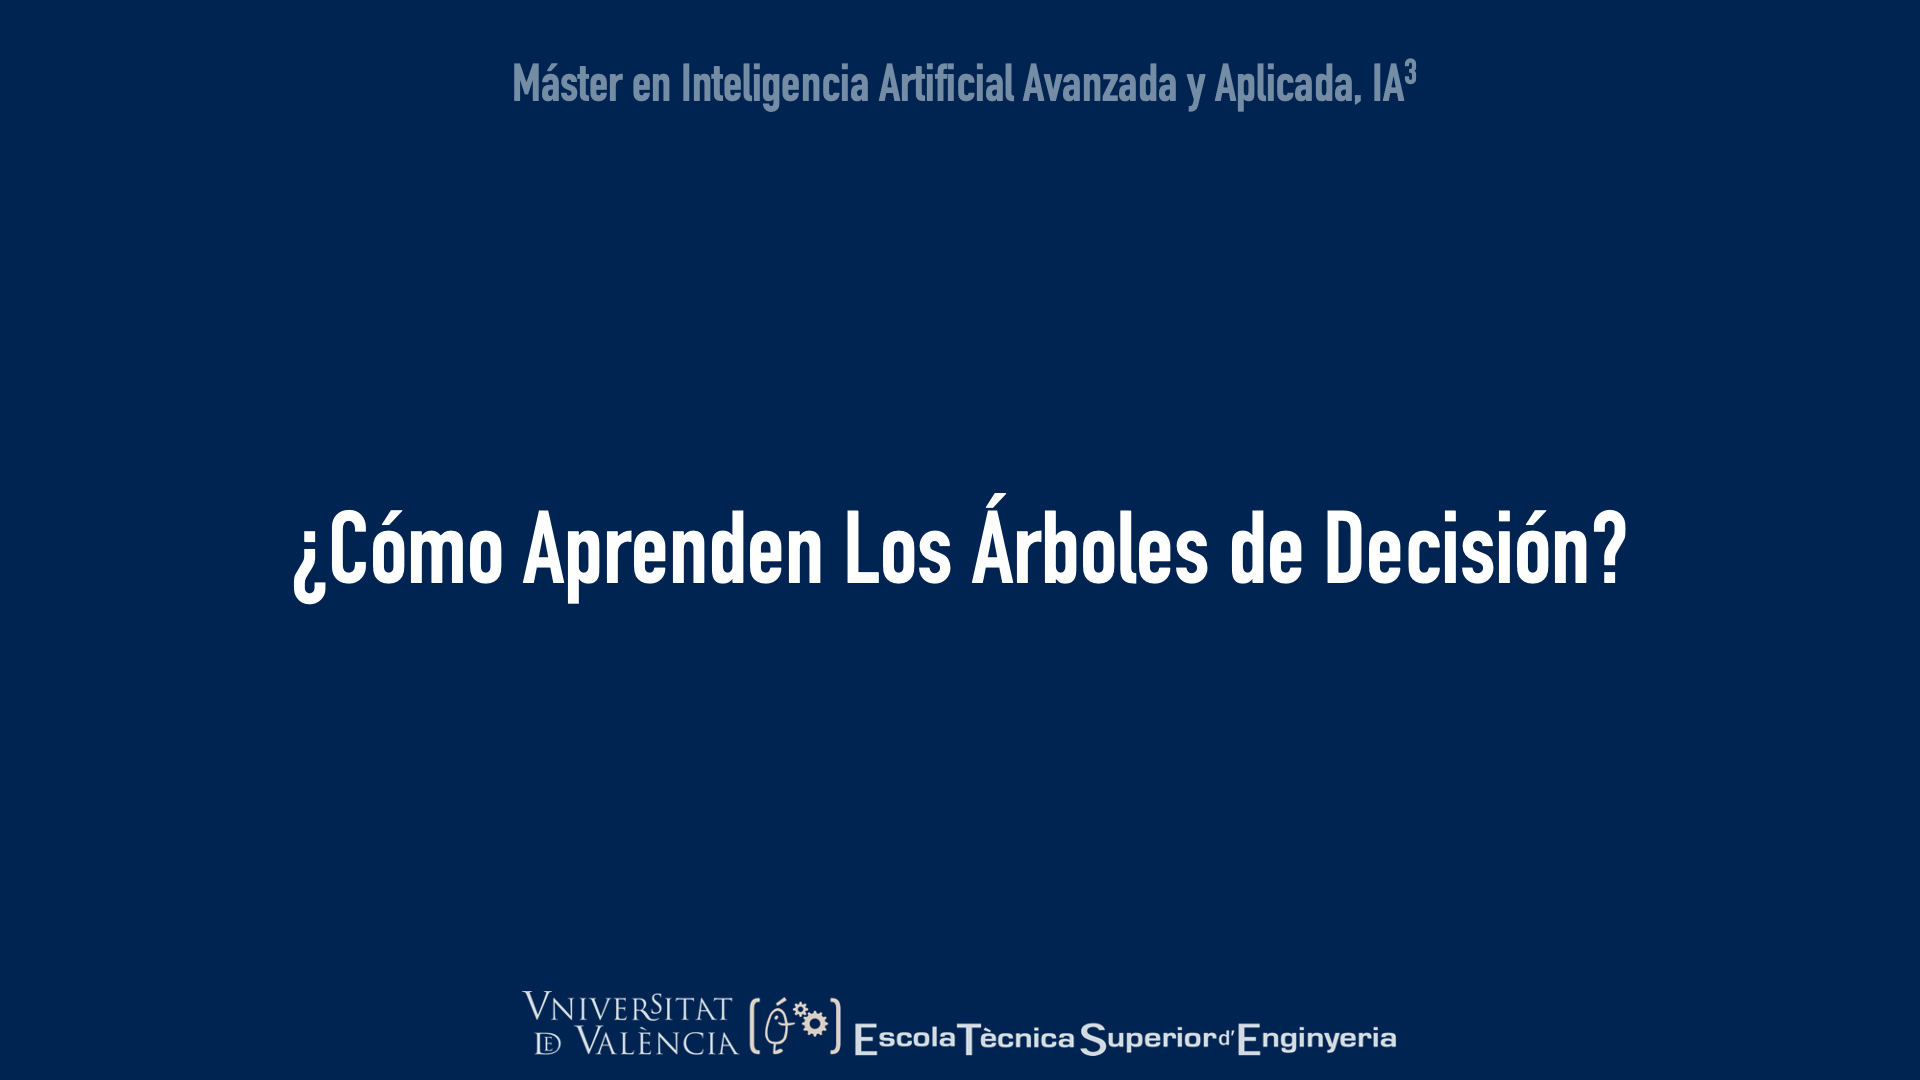

Vamos a realizar una pequeña aproximación teórica al entrenamiento de árboles de decisión. Este tipo de algoritmos intenta encontrar la variable que mejor divida al dataset. Dependiendo del ejercicio propuesto intentará realizar la división en una o más ramas (One vs the rest o One vs one). Sin embargo, independientemente del número de divisiones propuestas, siempre priorizará la variable que obtenga una mejor división, por este motivo se dice que sigue un criterio egoísta o codicioso (greed).

Utilizando el modelo sencillo anterior vamos a intentar realizar diversas divisiones (splits) sobre el dataset de Iris y vamos a medir la pureza de los datasets resultantes de este ejercicio.

Utilizando la variable petal length realiza divisiones del dataset en los siguientes puntos:

- Cuartil 25
- Cuartil 50
- Cuartil 75

En base a los resultados y a las gráficas calculadas:

- Evalúa el modelo
- Encuentra un nuevo punto de split si lo consideras necesario

Para evaluar el modelo utilizaremos la métrica conocida como entropía. La entropía de una función es mínima en dos puntos diferentes:

- Primero cuando la probabilidad de pertenecer a una determinada clase es 0, es decir no existen muestras de esa clase en el conjunto de datos.

- Cuando la probabilidad de pertenecer a una determinada clase es 1, es decir, todas las muestras de esa clase en el conjunto de datos son iguales.

De esta manera la entropía de una función medirá la pureza del split, o dicho de otra manera, la capacidad de esta división por separar las clases.


<center>

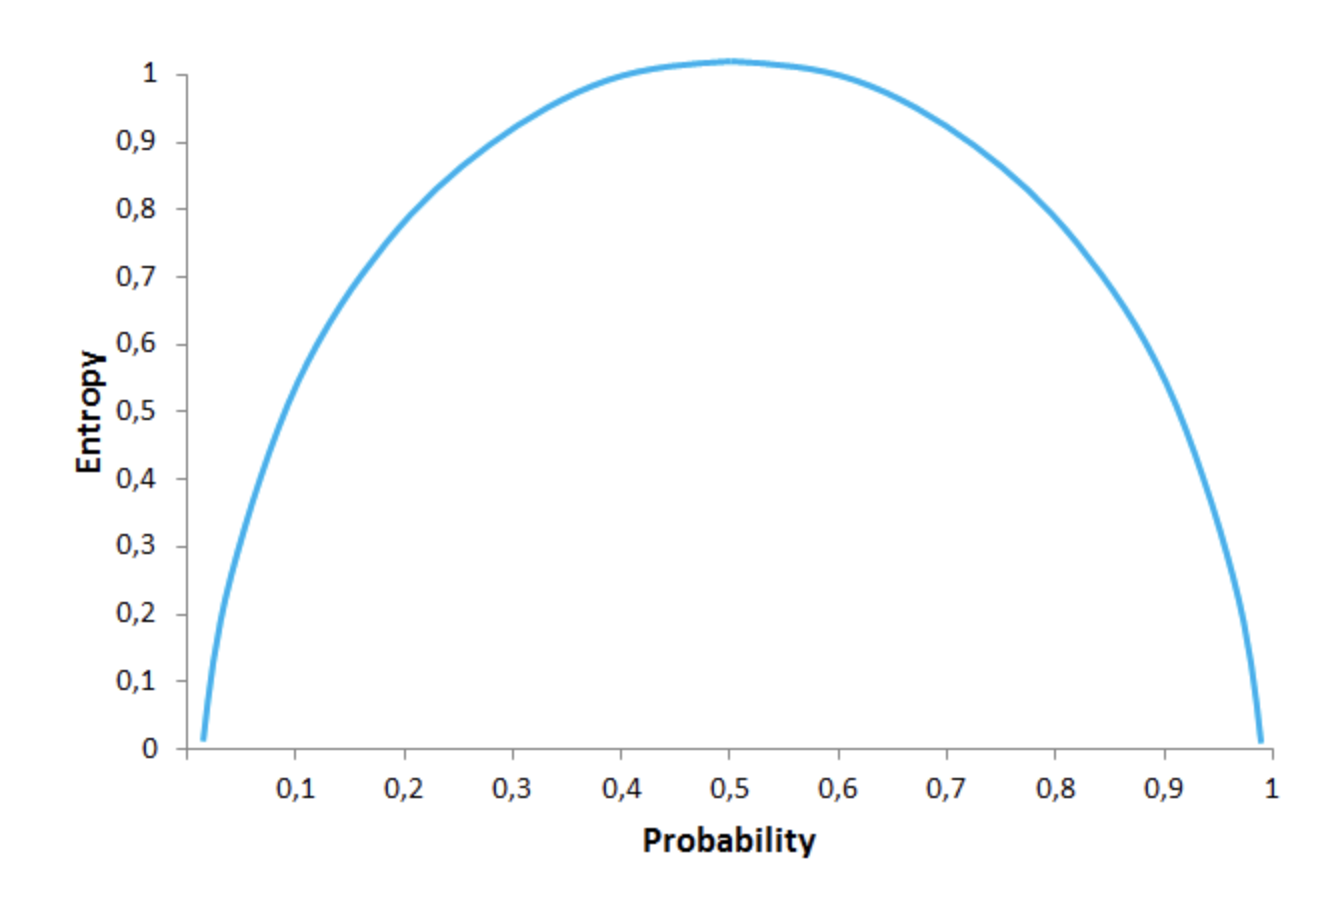

</center>

In [42]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from math import log

In [43]:
dataset = sns.load_dataset("iris")

In [44]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [23]:
def transform_classes(y, class_name):
  new_classes = []
  for sample in y:
    if sample == class_name:
      new_sample = class_name
    else:
      new_sample = "Other"
    new_classes.append(new_sample)
  return new_classes

def basic_splitter(df, threshold, class_name, split_type = "lower"):
  Y = transform_classes(df["species"], class_name)
  df["species"] = Y
  if split_type == "lower":
    bool_array = df["petal_length"] < threshold
  elif split_type == "greater":
    bool_array = df["petal_length"] > threshold
  dataset_filtered = df[bool_array]
  return dataset_filtered

In [13]:
# Ejemplo

threshold = 1

df_filtered = basic_splitter(dataset, threshold, 
                             "setosa", split_type = "greater")


In [16]:
df_filtered

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Other
146,6.3,2.5,5.0,1.9,Other
147,6.5,3.0,5.2,2.0,Other
148,6.2,3.4,5.4,2.3,Other


In [ ]:
def entropy_calculation(selected_class, other):
  total = selected_class+other
  prob_class = selected_class/total
  prob_other = other/total
  entropy_class = - prob_class * log(prob_class+0.00001,2)
  entropy_other = - prob_other * log(prob_other+0.00001,2)
  entropy = entropy_class + entropy_other
  return entropy

In [ ]:
entropy_calculation(49, 100)

0.913727577363888

In [19]:
threshold_2 = 2

df_filtered = basic_splitter(dataset, threshold_2, 
                             "setosa", split_type = "lower")

In [21]:
df_filtered.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50


In [30]:
threshold_3 = 4.8

df_filtered = basic_splitter(dataset, threshold_3, 
                             "virginica", split_type = "greater")

In [31]:
df_filtered.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Other,51,51,51,51


Continuemos realizando nuestro ejercicio de clasificación utilizando el módulo de sklearn para entrenar un DecisionTreeClassifier. Una vez capturada la intuición de como este algoritmo aprende a distinguir entre clases, visualizaremos el resultado de ajustarlo a un set de entrenamiento y comprobaremos que los splits que hemos realizado sobre el espacio son en efecto decisiones que podría tomar el algoritmo (aproximadamente).

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [35]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
model.score(X_train, Y_train)

1.0

In [46]:
model.score(X_test, Y_test)

1.0

[Text(167.4, 108.72, 'entropy = 0.0\nsamples = 112\nvalue = 112.0')]

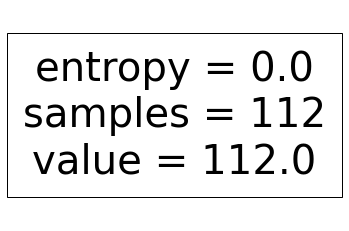

In [47]:
plot_tree(model, feature_names=X.columns)

Como podéis observar el árbol de decisión ha sido capaz de detectar y realizar un split perfecto. Tras observar y visualizar el espacio de características podríais preguntaros que sentido tiene plantear un árbol de decisión si podéis alcanzar el mismo resultado tan solo visualizando y decidiendo el split por vosotros mismos. De nuevo quiero aprovechar esta oportunidad para recalcar, que los diferentes datasets a los que os enfrentaréis no serán  siempre visualizables, ni separables de forma sencilla. En este mundo donde las fuentes de información crecen en cantidad y complejidad la única forma de resolver estos problemas es mediante **Machine Learning** y **Analítica Avanzada**

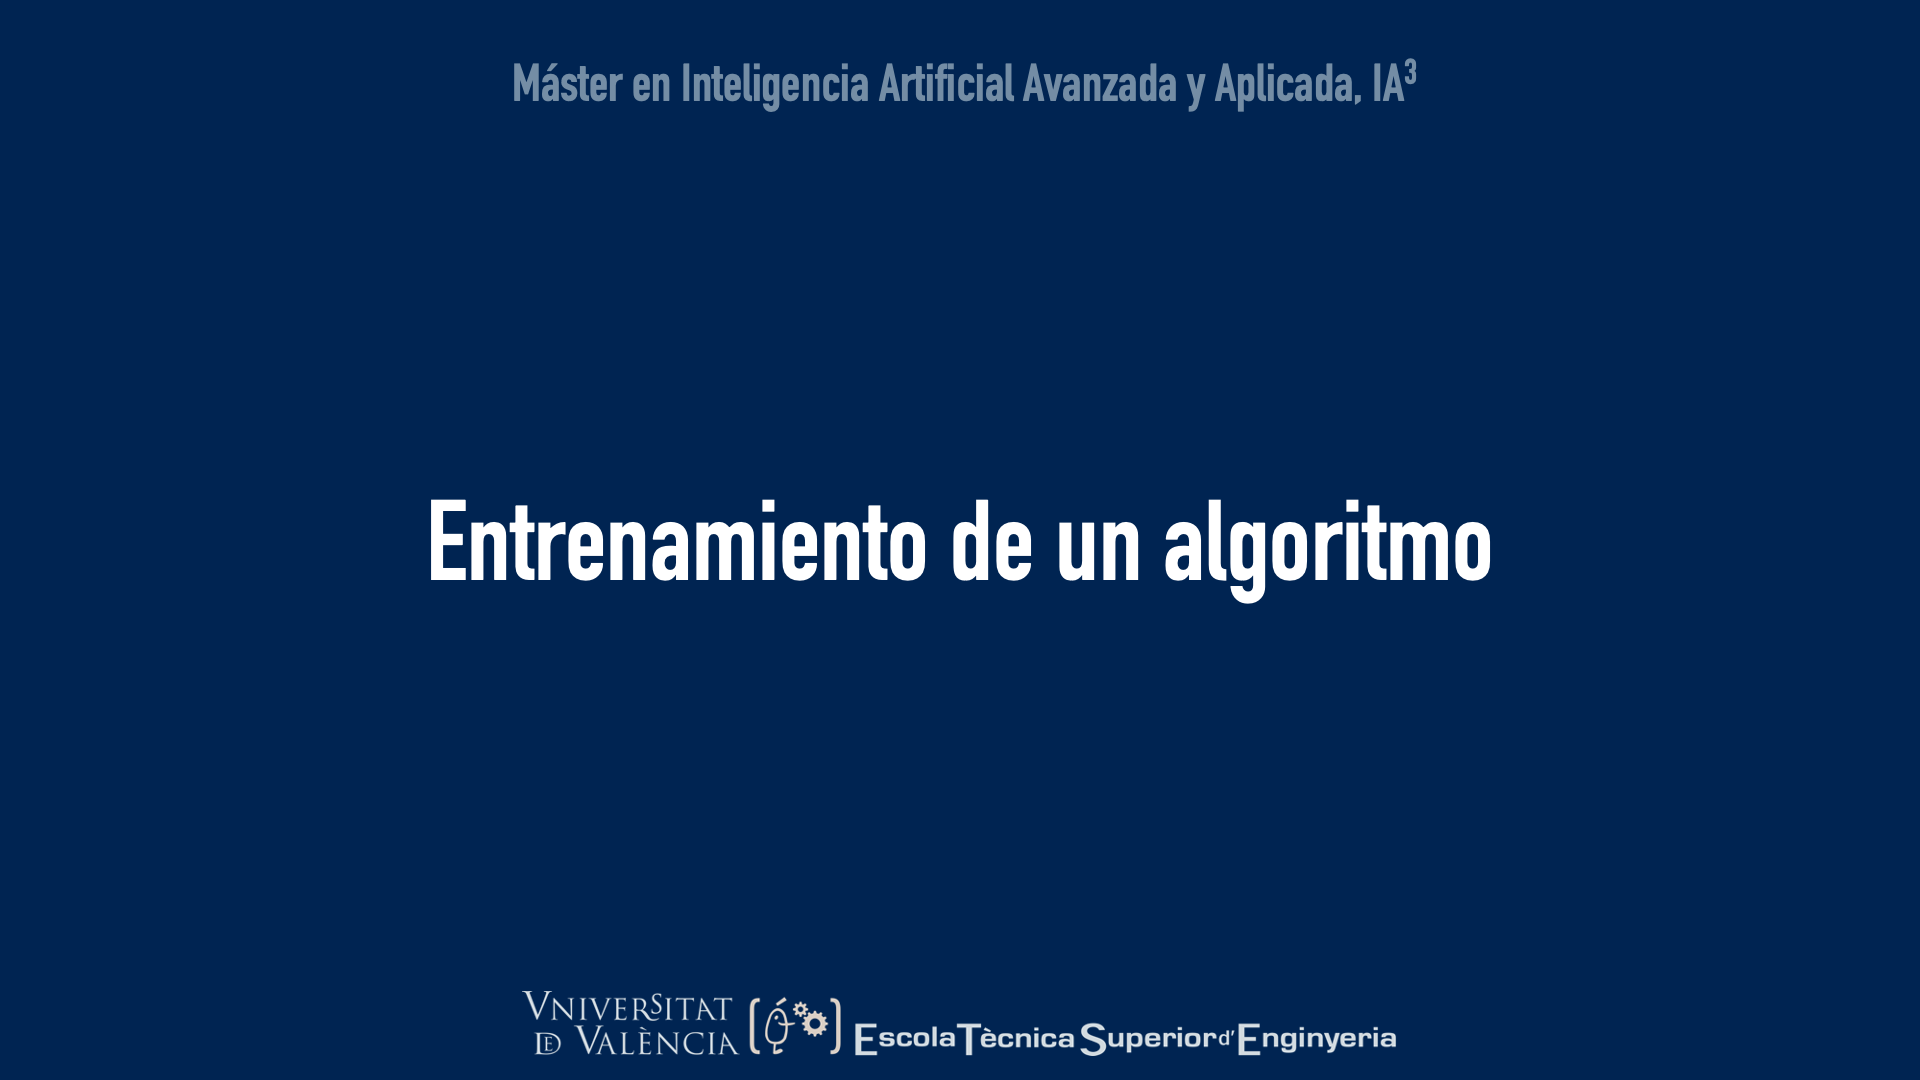

Vamos a comprobar la afirmación anterior realizando un primer ejercicio de entrenamiento completo:

- Train/Test Split
- Definición de Modelo
- Entrenamiento del Modelo
- Evaluación usando accuracy

## Train/Test Split

Comencemos con uno de los pasos más importantes en el entrenamiento la selección de sets de training y testing. Cuando entrenamos un algoritmo seleccionamos un dataset que contenga la mayor cantidad de información posible. Para nuestro algoritmo, este dataset es el universo total de posibilidades que va a tratar de aprender y representa todas las opciones que los datos podrían describir. Sin embargo, la realidad es que nuestro dataset nunca contendrá todo el universo de posibilidades, por eso nuestro objetivo será enseñar al algoritmo a **generalizar**

Permitidme explicarme:

<center>

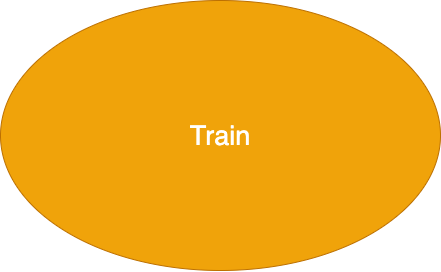

</center>

La elipse anterior representa todo el conjunto de datos del que disponemos. Si permitimos al algoritmo aprender este espacio, es posible que encuentre la forma de predecir cada punto en él y obtenga un resultado perfecto en su evaluación. Sin embargo, este comportamiento es rara vez deseado, puesto que una vez el algoritmo se enfrente a una situación real, su aprendizaje no le permitirá generalizar para la información que provenga del exterior de esa elipsis. Resumiendo, nuestro algoritmo no podrá generalizar más allá de lo que ha visto hasta el momento. Por eso tradicionalmente se ha dividido el dataset en dos porciones diferentes una para entrenamiento y otra para validación (training y testing).

<center>

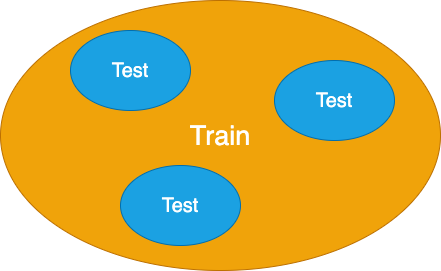

</center>

La idea es extraer pequeños trozos del dataset de entrenamiento que representen de forma general el espacio de características original. Nuestro algoritmo seguirá siendo entrenando sobre el conjunto más amplio (Train), pero la evaluación se realizará sobre el conjunto reducido (Test). Como el algoritmo no ha visto en ningún momento la información de este segundo conjunto, las predicciones que realice podrán aportarnos información sobre su rendimiento en un escenario fuera de su entrenamiento.

Vamos a realizar un nuevo ejercicio sobre el dataset "penguins" de seaborn. Nuestro objetivo será predecir el sexo del pingüino. El primero paso en este ejercicio será:

- Comprobar la existencia de nulos en el dataset y eliminarlos si existen.
- Convertir las variables species e island a tipo dummy utilizando el método pd.get_dummies() de pandas
- Unir las nuevas variables dummy al dataset original (tirad las columnas anteriores si aún se mantienen)
- Realizar el train_test_split usando el método con el mismo nombre de sklearn.

In [70]:
dataset = sns.load_dataset("penguins")

In [71]:
# Check NA
dataset.dropna(inplace=True)
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [72]:
y = dataset.sex
X_full = dataset.drop(columns = 'sex')
X = pd.get_dummies(X_full)

In [73]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [74]:
# Entrenamiento y evaluación del modelo
model_2 = DecisionTreeClassifier(criterion='entropy')
model_2.fit(X_train,y_train)
preds = model_2.predict(X_test)
model_2.score(X_test,y_test)

0.8656716417910447

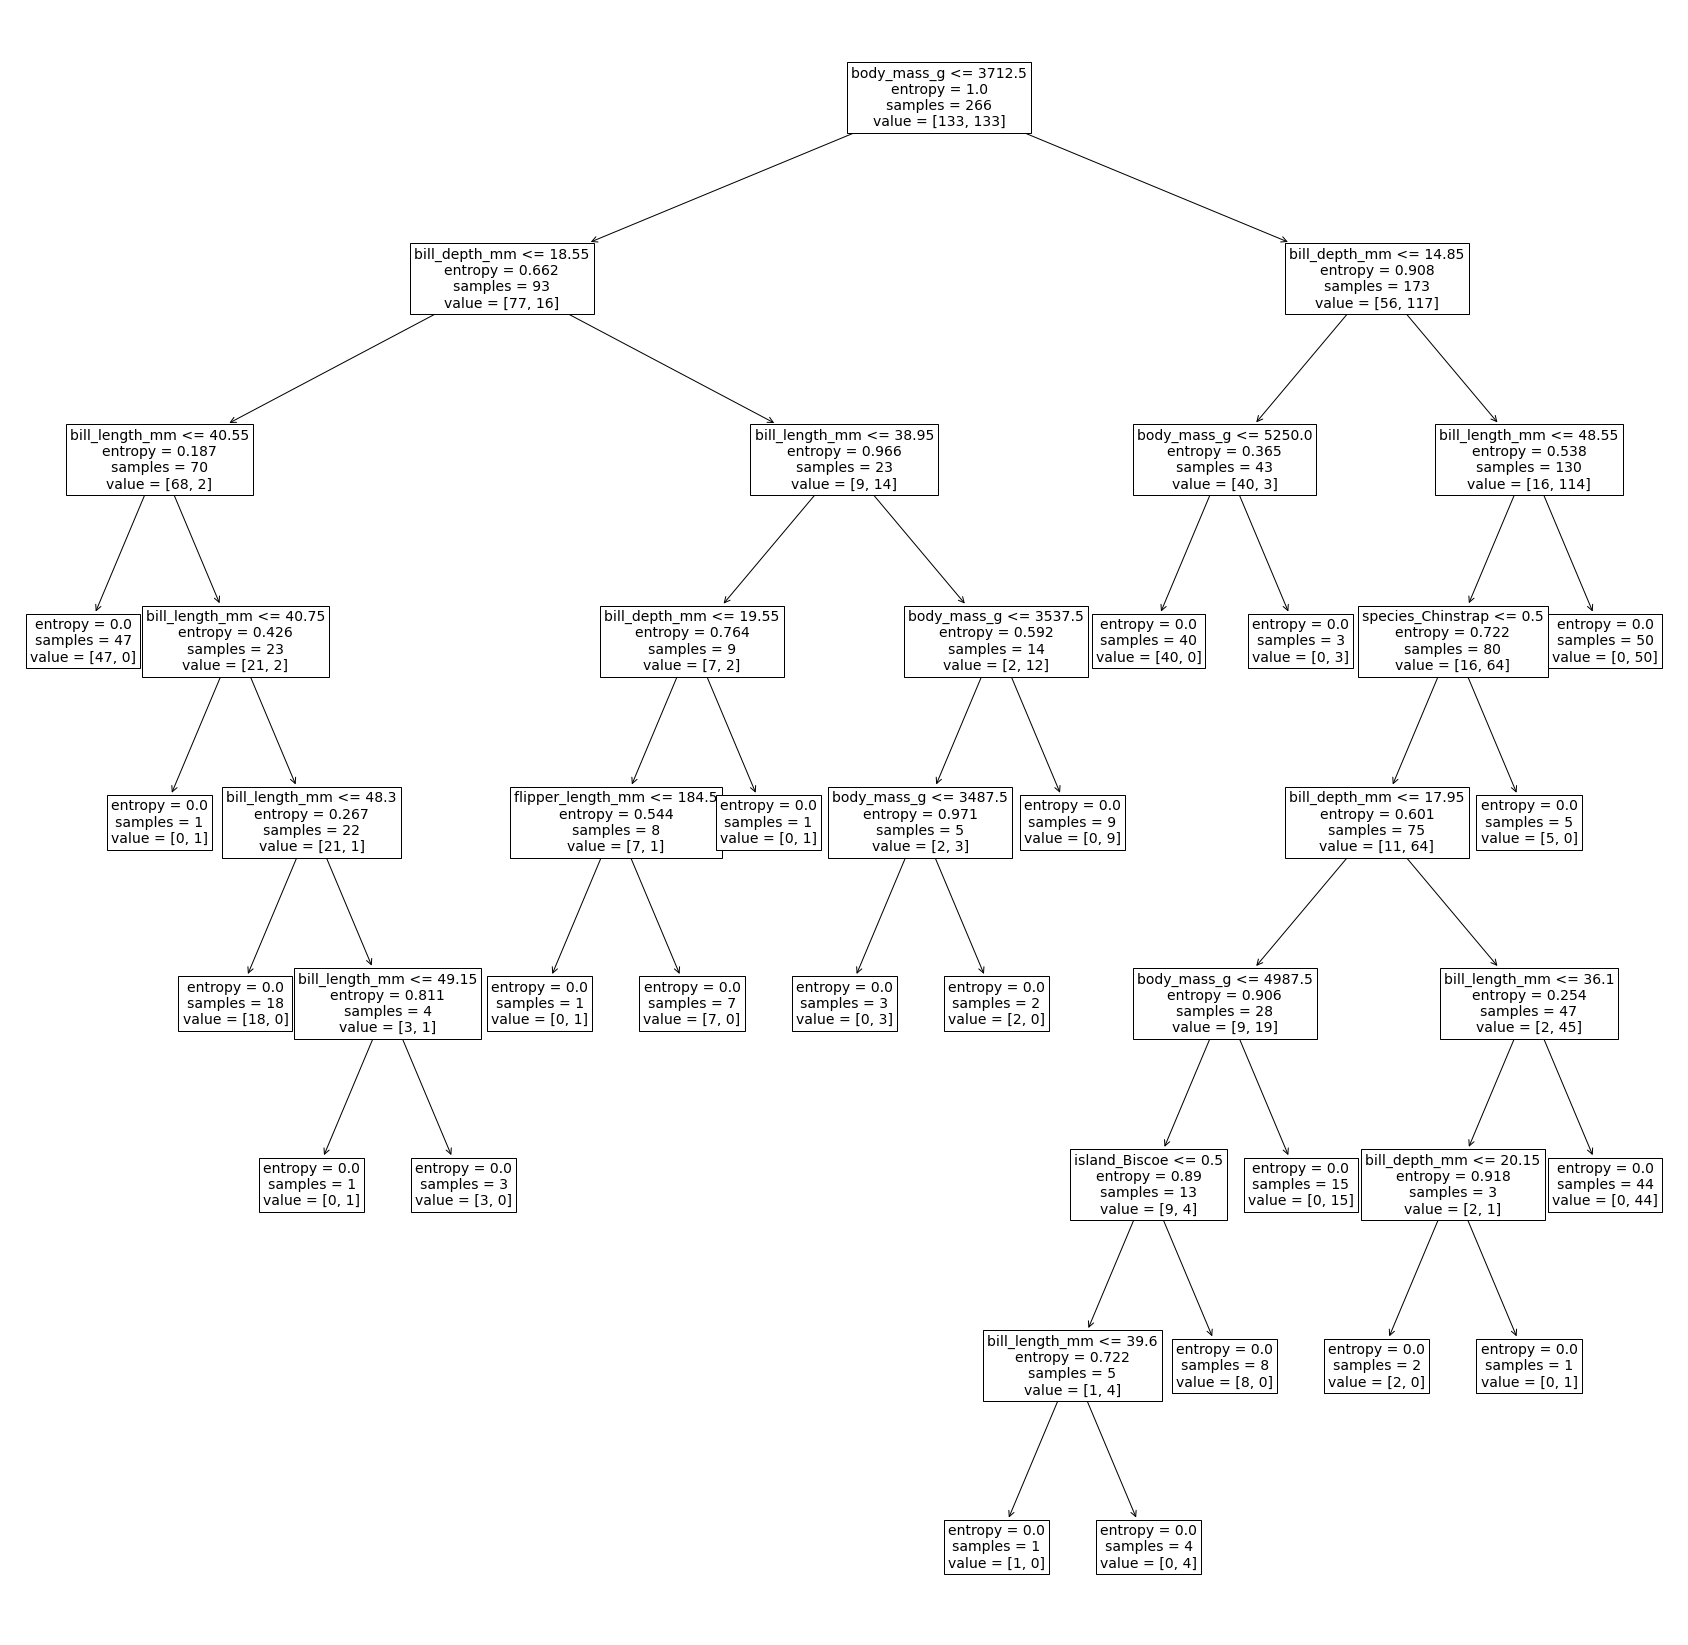

In [69]:
# Dibujad usando esta celda
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(model_2, feature_names=X_dum.columns, fontsize=14)
plt.show()

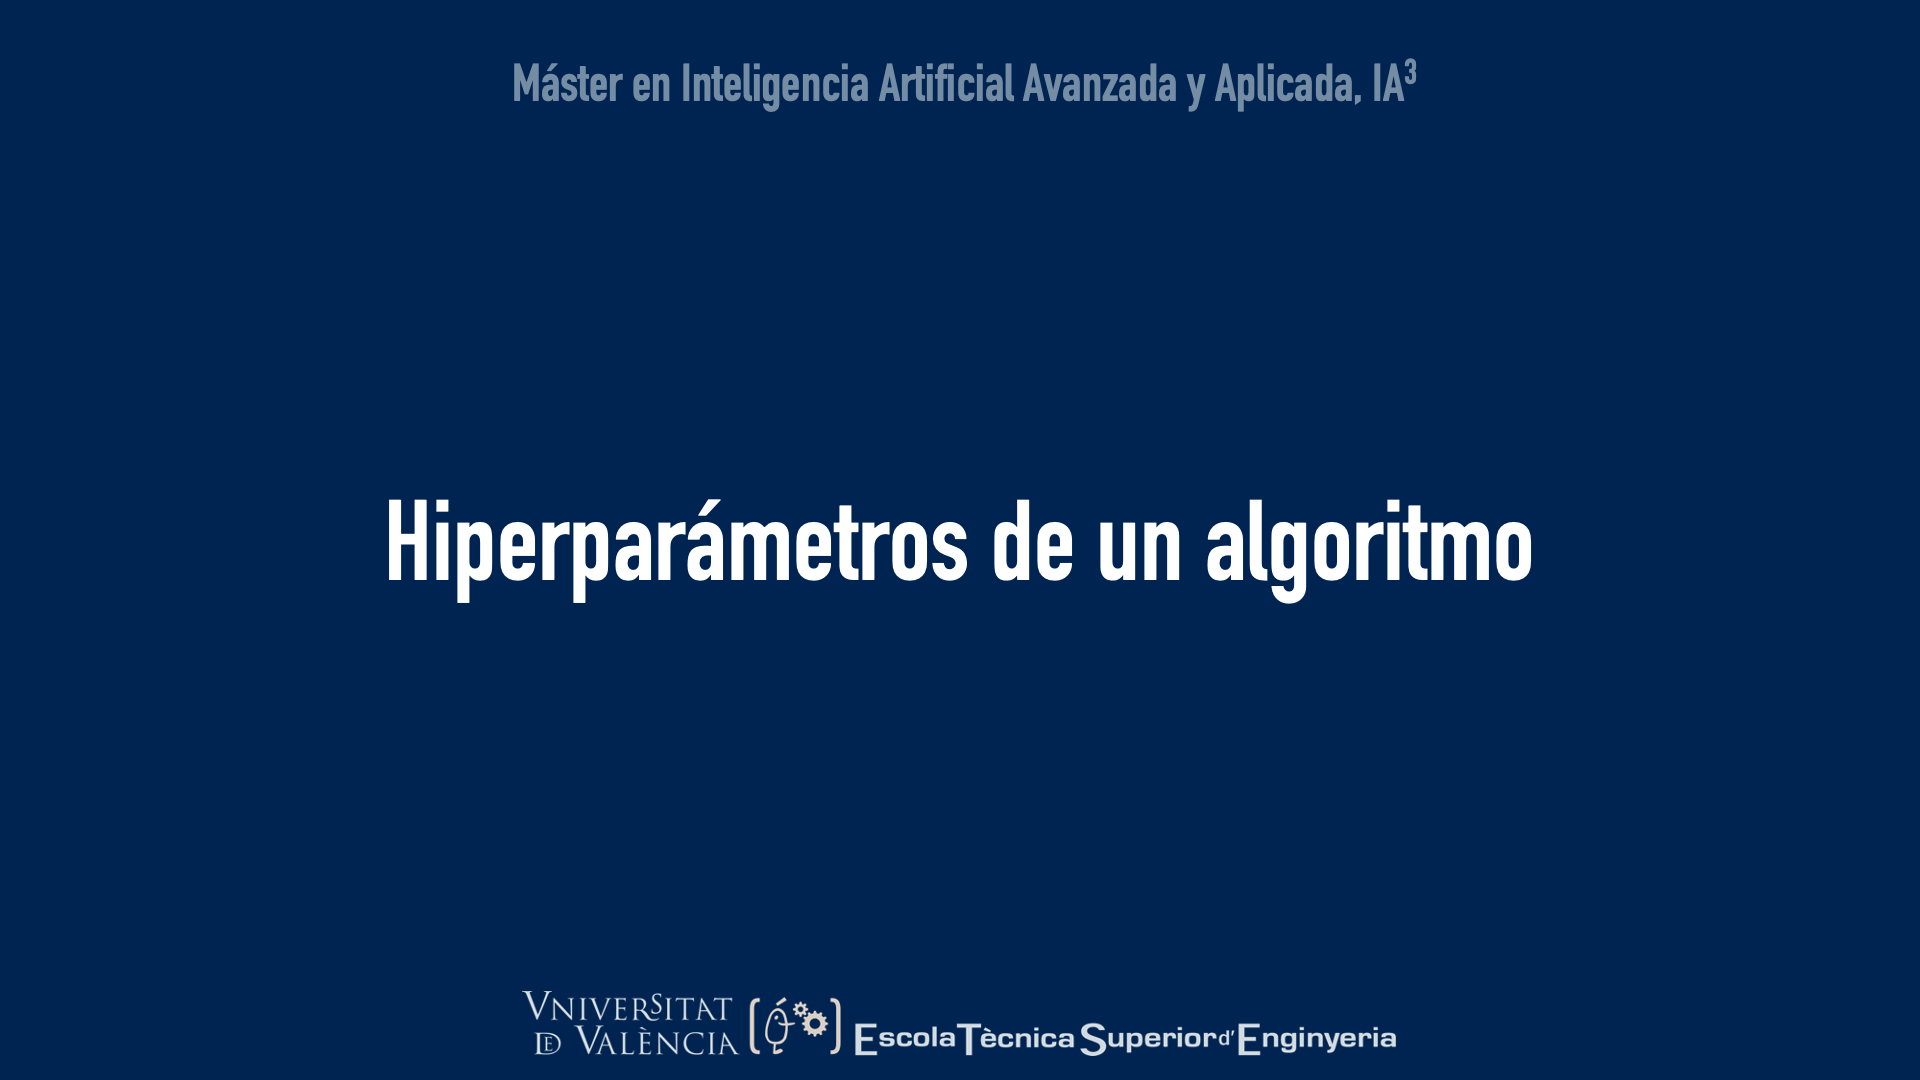

Los hiperparámetros de un algoritmo son un conjunto de valores que controlan el comportamiento del algoritmo. Permiten controlar cualidades como la complejidad que un algoritmo puede adoptar a la hora de aprender el espacio de un conjunto de entrenamiento.

Para nuestro ejemplo actual utilizaremos dos hiperparámetros:

- max_depth: Controla la profundidad máxima del árbol de decisión. Si este parámetro no se define el árbol crecerá de forma indefinida hasta alcanzar el máximo nivel de pureza en cada split o hasta que cada split contenga un número de muestras igual a min_samples.

- min_samples: Número de muestras mínimo permitido para realizar la división de un dataset. Si al realizar la división el número de muestras es inferior a este parámetro el árbol descartaría el split.

Estos hiperparámetros se utilizan en este algoritmo para evitar el sobreajuste (overfitting).

El overfitting se produce en un algoritmo cuando un algoritmo es capaz de realizar predicciones muy precisas sobre el set de entrenamiento, pero sin embargo su rendimiento sobre el dataset de validación es sustancialmente menor. Como habréis podido comprobar en el caso anterior, el score en vuestro dataset de test es, en efecto, inferior al dataset de entrenamiento.

Realizad de nuevo el ejercicio anterior, pero esta vez utilizad los hiperparámetros propuestos para mejorar vuestro rendimiento sobre el dataset de test.

In [ ]:
# Escribid aquí vuestro código

In [109]:
model_3 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=15)
model_3.fit(X_train,y_train)
preds = model_3.predict(X_test)
model_3.score(X_test,y_test)

0.8656716417910447

In [110]:
model_3.score(X_train,y_train)

0.8834586466165414

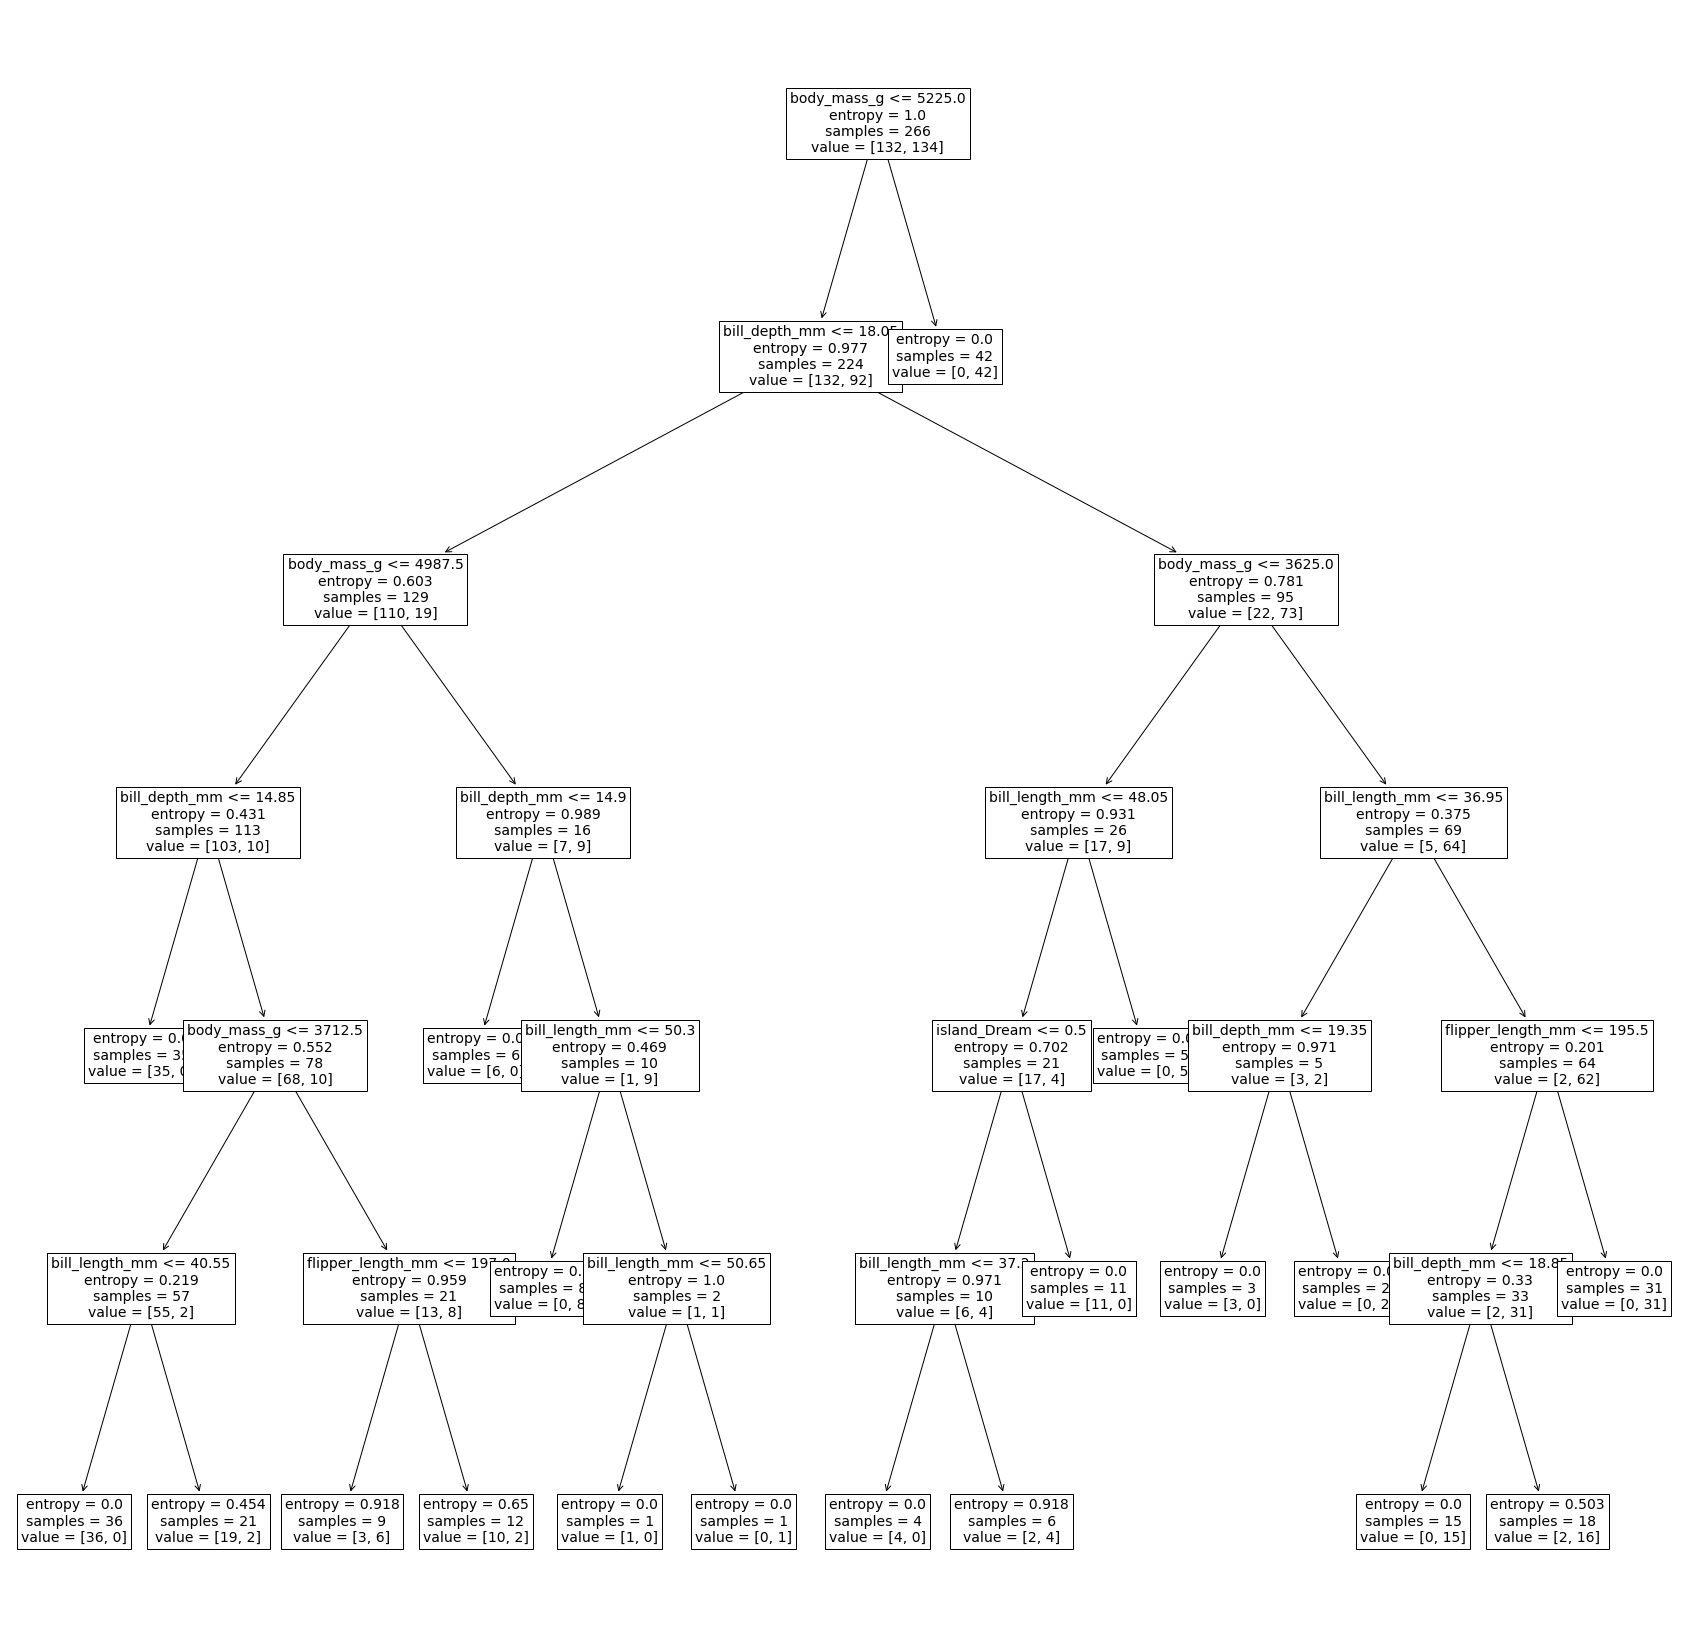

In [81]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(model_3, feature_names=X.columns, fontsize=14)
plt.show()